In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
test_results = glob.glob(r'./results/*test.csv')
val_results = glob.glob(r'./results/*test.csv')

In [3]:
test = []
for experiment in test_results:
    df = pd.read_csv(experiment, index_col =0)
    df.columns =[experiment.split('\\')[-1].replace(".csv","")]
    test.append(df)
tests = pd.concat(test, axis =1)

In [4]:
val = []
for experiment in val_results:
    df = pd.read_csv(experiment, index_col =0)
    df.columns =[experiment.split('\\')[-1].replace(".csv","")]
    val.append(df)
vals = pd.concat(val, axis =1)

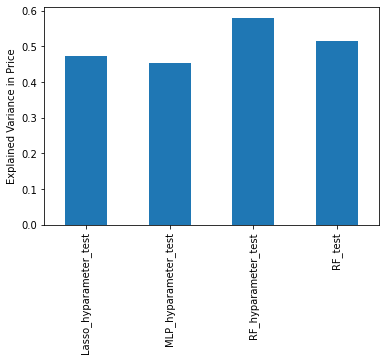

In [5]:
fig, ax = plt.subplots()
(vals.T['corrcoef']**2).plot.bar(ax =ax)
ax.set_ylabel('Explained Variance in Price')
fig.savefig('./results/Explainedvariance_valid.png', dpi =300, bbox_inches ='tight')

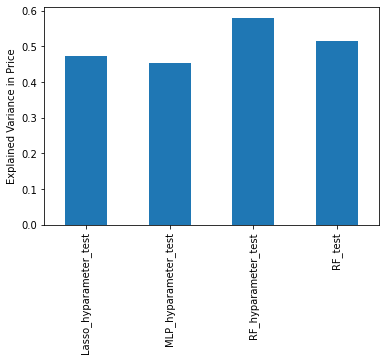

In [6]:
fig, ax = plt.subplots()
(tests.T['corrcoef']**2).plot.bar(ax =ax)
ax.set_ylabel('Explained Variance in Price')
fig.savefig('./results/Explainedvariance_tests.png', dpi =300, bbox_inches ='tight')

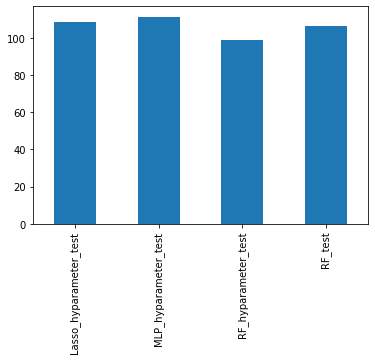

In [7]:
fig, ax = plt.subplots()
(tests.T['rmse']).plot.bar(ax =ax)
fig.savefig('./results/rmse_tests.png', dpi =300, bbox_inches ='tight')

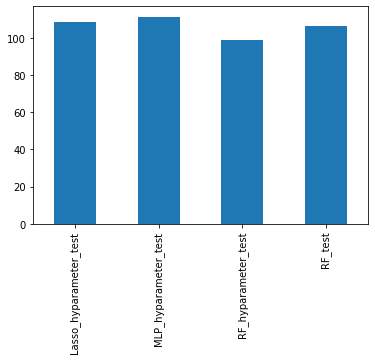

In [8]:
fig, ax = plt.subplots()
(vals.T['rmse']).plot.bar(ax =ax)
fig.savefig('./results/rmse_tests.png', dpi =300, bbox_inches ='tight')

In [9]:
vals.to_csv('./results/val_results.csv')
tests.to_csv('./results/test_results.csv')